<a href="https://colab.research.google.com/github/HaroldRen99/22WEcon441/blob/main/22w441b_In_Class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error as mse

# Import the data from CCLE into a new Google Colab file

In [ ]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
ins = pd.read_csv("/content/gdrive/MyDrive/insurance.csv")

In [ ]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Labeling for sex
ins.loc[ins["sex"] == "female","sex"] = 1.
ins.loc[ins["sex"] == "male","sex"] = 0.

In [ ]:
# Labeling for smoker
ins.loc[ins["smoker"] == "yes", "smoker"] = 1
ins.loc[ins["smoker"] == "no", "smoker"] = 0

In [ ]:
# Labeling for region. Only 3 dummy variables are included because of perfect multicollinearity
ins.loc[ins["region"] == "southwest", "is_southwest"] = 1
ins.loc[ins["region"] != "southwest", "is_southwest"] = 0
ins.loc[ins["region"] == "northwest", "is_northwest"] = 1
ins.loc[ins["region"] != "northwest", "is_northwest"] = 0
ins.loc[ins["region"] == "southeast", "is_southeast"] = 1
ins.loc[ins["region"] != "southeast", "is_southeast"] = 0

In [ ]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_northwest,is_southeast
0,19,1.0,27.900,0,1,southwest,16884.92400,1.0,0.0,0.0
1,18,0.0,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0
2,28,0.0,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0
3,33,0.0,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0
4,32,0.0,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0


In [ ]:
x_set = ins[["age","sex","bmi","children","smoker","is_southwest","is_northwest","is_southeast"]]

# Split the data into 80/20, in/out sample

In [ ]:
cut = int((len(x_set)*0.8)//1)

In [ ]:
in_data = x_set[:cut]
out_data = x_set[cut:]
in_target = ins["charges"][:cut]
out_target = ins["charges"][cut:]

In [ ]:
in_data.head()

,age,sex,bmi,children,smoker,is_southwest,is_northwest,is_southeast
0,19,1.0,27.900,0,1,1.0,0.0,0.0
1,18,0.0,33.770,1,0,0.0,0.0,1.0
2,28,0.0,33.000,3,0,0.0,0.0,1.0
3,33,0.0,22.705,0,0,0.0,1.0,0.0
4,32,0.0,28.880,0,0,0.0,1.0,0.0


# Normalize the Data

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [ ]:
in_data_sc = scaler.transform(in_data)
out_data_sc = scaler.transform(out_data)

In [ ]:
in_data_sc

array([[-1.45390122,  1.02077653, -0.47403991, ...,  1.76504522,
        -0.55791981, -0.6155209 ],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.56655772,
        -0.55791981, -0.6155209 ],
       [ 1.65886228, -0.97964634, -1.50008089, ..., -0.56655772,
         1.79237229, -0.6155209 ],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.56655772,
        -0.55791981,  1.6246402 ]])

# Get lambda from Lasso cross validation

In [ ]:
modelCV = LassoCV().fit(in_data_sc, in_target)

In [ ]:
alpha = modelCV.alpha_

In [ ]:
alpha

115.9799859390741

# Run a Lasso Regression with that Lambda

In [ ]:
model = Lasso(alpha = alpha).fit(in_data_sc, in_target)
model.predict(in_data_sc)
model.coef_

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 ,   -0.        , -158.68185954])

# Visualize the coefficients

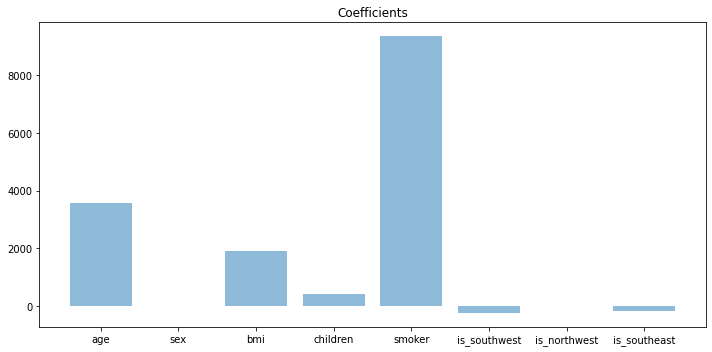

In [ ]:
objs = ["age","sex","bmi","children","smoker","is_southwest","is_northwest","is_southeast"]
plt.figure(figsize = (10,5))
plt.bar(objs, model.coef_, alpha = 0.5)
plt.title("Coefficients")
plt.tight_layout()
plt.show()

# Interpret the coefficients

From the results, we can see that the charges may not be significantly effected by sex & is_northwest, which indicates that whether people are male or female, live in northwest or other places do not effect the charges of insurance.

In comparison, the charges may be largely effected by whether the sample is a smoker, mediately affected by the age & bmi of the sample.

# Compare in and out of sample MSEs

In [ ]:
in_pred = model.predict(in_data_sc)
out_pred = model.predict(out_data_sc)

In [ ]:
in_mse = mse(in_pred, in_target)
out_mse = mse(out_pred, out_target)
print(in_mse)
print(out_mse)

36521811.462161295
37152269.57019608


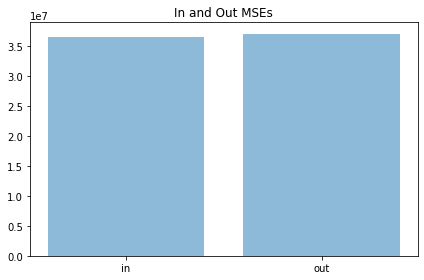

In [ ]:
plt.figure(figsize = (6,4))
plt.bar(["in","out"], [in_mse, out_mse], alpha = 0.5)
plt.title("In and Out MSEs")
plt.tight_layout()
plt.show()